In [1]:
from PIL import Image
import pandas as pd
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dropout
from keras.models import Sequential
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import os
import tensorflow as tf
from tensorflow import keras

In [2]:
ourGenre = 'Crime'

In [3]:
data = pd.read_csv(f"../GenresCSV/{ourGenre}.csv")
data

,Unnamed: 0,imdbID,Genre
0,0,tt0080684,0
1,1,tt0080684,0
2,2,tt0080684,0
3,3,tt0080377,0
4,4,tt0080377,0
...,...,...,...
2285,2285,tt3801934,1
2286,2286,tt2293060,1
2287,2287,tt2788512,1
2288,2288,tt2460506,1


In [4]:
genre = []
poster = []

In [5]:
for i in range(len(data)):
    tempImage = Image.open(f"../Posters100x100/{data['imdbID'][i]}.jpg")
    poster.append(np.array(tempImage))
    genre.append(data['Genre'][i])

In [6]:
print(len(genre))
print(len(poster))
print(len(poster[0]))
print(len(poster[0][0]))
print(len(poster[0][0][0]))

2290
2290
100
100
3


In [14]:
GenreStrings = [f"Not {ourGenre}", f"{ourGenre}"]

In [15]:
for i in range(len(poster) -1, -1 ,-1):
    if poster[i].shape != (100,100,3): 
        #some posters didnt have 100,100,3 so we deleted them
        genre.pop(i)
        poster.pop(i)
        
print(len(genre))

2290


In [16]:
X_train, X_test, y_train, y_test = train_test_split(poster, genre, test_size=0.1)

In [17]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

2061
2061
229
229


In [18]:
X_train = np.array(X_train) #turn them into numpy arrays
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [19]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

x_train shape: (2061, 100, 100, 3)
2061 train samples
229 test samples


In [20]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
print (y_train.shape)
print(y_test.shape)
print (y_train)
print (y_train[0])

(2061, 2)
(229, 2)
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]
[0. 1.]


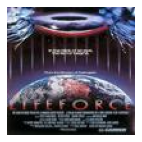

[1. 0.]
Not Crime


In [21]:
index = 50
plt.figure(figsize=(20, 4))
# original
plt.subplot(2, 10, 1)
# plt.figure(figsize = (15,2))
plt.imshow(X_train[index].reshape(100, 100,3))
plt.gray()
plt.axis('off')
plt.tight_layout()
plt.show()
print(y_train[index])
print(GenreStrings[np.argmax(y_train[index])])

In [22]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(len(GenreStrings), activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dropout (Dropout)           (None, 20000)             0

In [23]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=["accuracy"])

In [24]:
model.fit(X_train, y_train, epochs =5, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/5
13/13 [==============================] - 10s 775ms/step - loss: 0.7106 - accuracy: 0.5400 - val_loss: 0.6767 - val_accuracy: 0.5738
Epoch 2/5
13/13 [==============================] - 10s 773ms/step - loss: 0.6689 - accuracy: 0.6074 - val_loss: 0.6484 - val_accuracy: 0.6707
Epoch 3/5
13/13 [==============================] - 11s 827ms/step - loss: 0.6293 - accuracy: 0.6572 - val_loss: 0.6222 - val_accuracy: 0.6634
Epoch 4/5
13/13 [==============================] - 10s 782ms/step - loss: 0.5834 - accuracy: 0.7033 - val_loss: 0.6034 - val_accuracy: 0.6416
Epoch 5/5
13/13 [==============================] - 10s 804ms/step - loss: 0.5362 - accuracy: 0.7409 - val_loss: 0.5847 - val_accuracy: 0.6901


In [25]:
model.fit(X_train, y_train, epochs =5, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/5
13/13 [==============================] - 10s 779ms/step - loss: 0.4877 - accuracy: 0.7731 - val_loss: 0.5284 - val_accuracy: 0.7215
Epoch 2/5
13/13 [==============================] - 10s 792ms/step - loss: 0.4272 - accuracy: 0.8113 - val_loss: 0.4952 - val_accuracy: 0.7385
Epoch 3/5
13/13 [==============================] - 10s 784ms/step - loss: 0.3661 - accuracy: 0.8568 - val_loss: 0.4580 - val_accuracy: 0.7700
Epoch 4/5
13/13 [==============================] - 11s 816ms/step - loss: 0.3248 - accuracy: 0.8677 - val_loss: 0.4269 - val_accuracy: 0.7869
Epoch 5/5
13/13 [==============================] - 10s 790ms/step - loss: 0.2832 - accuracy: 0.8968 - val_loss: 0.4234 - val_accuracy: 0.8111


(229, 2)


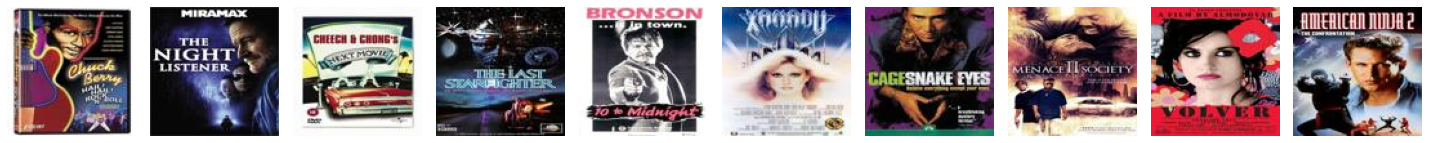

[0.86100745 0.1389926 ]
0
Genre is Not Crime Predicted is Not Crime ([0.86100745 0.1389926 ])
Genre is Crime Predicted is Crime ([0.00657892 0.99342114])
Genre is Crime Predicted is Crime ([0.00368819 0.99631184])
Genre is Not Crime Predicted is Crime ([0.3626952 0.6373048])
Genre is Crime Predicted is Crime ([0.02133728 0.97866267])
Genre is Not Crime Predicted is Not Crime ([0.8195896  0.18041039])
Genre is Crime Predicted is Crime ([0.05364444 0.9463555 ])
Genre is Crime Predicted is Crime ([0.0247664  0.97523355])
Genre is Crime Predicted is Crime ([0.38817415 0.6118258 ])
Genre is Not Crime Predicted is Not Crime ([0.51787233 0.4821277 ])


In [26]:
# Compare original images with Predicted ones
decoded_imgs1 = model.predict(X_test)
offset = 0
decoded_imgs1= decoded_imgs1[offset:]
print(decoded_imgs1.shape)
plt.figure(figsize=(20, 4))
for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    # plt.figure(figsize = (15,2))
    plt.imshow(X_test[i+offset].reshape(100, 100,3))
    plt.gray()
    plt.axis('off')
plt.tight_layout()
plt.show()
print(decoded_imgs1[0])
print(np.argmax(decoded_imgs1[0]))
for i in range(10):
  print(f"Genre is {GenreStrings[np.argmax(y_test[i+offset])]} Predicted is {GenreStrings[np.argmax(decoded_imgs1[i])]} ({decoded_imgs1[i+offset]})")

In [27]:
#Evaluate the trained model
#Should have test and train genres equal
score = model.evaluate(X_test, y_test)
print("Test Loss: {:.2f}%".format(score[0]*100))
print("Test Accuracy:  {:.2f}%".format(score[1]*100))

8/8 [==============================] - 0s 33ms/step - loss: 0.3940 - accuracy: 0.8297
Test Loss: 39.40%
Test Accuracy:  82.97%


In [28]:
checkpoint_path = f"../Weights/{GenreStrings[1]}/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [29]:
model.save_weights(checkpoint_path)

In [30]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'../Weights/Crime\\cp.ckpt'

In [31]:
# Loads the weights
model.load_weights(checkpoint_path)

In [32]:
# Re-evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

8/8 - 0s - loss: 0.3940 - accuracy: 0.8297 - 287ms/epoch - 36ms/step
Restored model, accuracy: 82.97%
